===========iteration:0===========
AdaGrad:1.980459257
Adam:2.21731406864
Momentum:2.31754629532
SGD:2.32681622009
===========iteration:100===========
AdaGrad:0.167882835895
Adam:0.320930007879
Momentum:0.402532172757
SGD:1.71994041087
===========iteration:200===========
AdaGrad:0.0943729856216
Adam:0.157405692176
Momentum:0.199234696398
SGD:0.858698537861
===========iteration:300===========
AdaGrad:0.0484339360532
Adam:0.0805293766116
Momentum:0.195954027391
SGD:0.534257746424
===========iteration:400===========
AdaGrad:0.0519008710049
Adam:0.120181190568
Momentum:0.130093412789
SGD:0.41713096604
===========iteration:500===========
AdaGrad:0.1279526571
Adam:0.166003464566
Momentum:0.263275281715
SGD:0.559299356997
===========iteration:600===========
AdaGrad:0.0466884696728
Adam:0.0718065687055
Momentum:0.129304023154
SGD:0.313209461203
===========iteration:700===========
AdaGrad:0.0975796724427
Adam:0.115253436521
Momentum:0.122554998978
SGD:0.363545723494
===========iteration:800=====

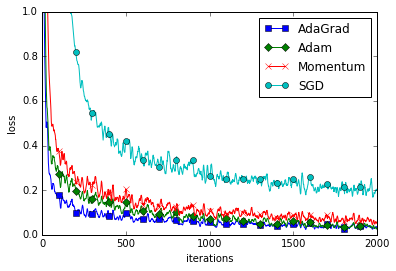

In [3]:
# coding: utf-8
import os
import sys
sys.path.append('/Users/hiroki/program/python/zero_deep_learning/deep_learning_from_scratch/')
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import *

%matplotlib inline

# 0:MNISTデータの読み込み==========
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000


# 1:実験の設定==========
optimizers = {}
optimizers['SGD'] = SGD()
optimizers['Momentum'] = Momentum()
optimizers['AdaGrad'] = AdaGrad()
optimizers['Adam'] = Adam()
#optimizers['RMSprop'] = RMSprop()

networks = {}
train_loss = {}
for key in optimizers.keys():
    networks[key] = MultiLayerNet(
        input_size=784, hidden_size_list=[100, 100, 100, 100],
        output_size=10)
    train_loss[key] = []    


# 2:訓練の開始==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in optimizers.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizers[key].update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    if i % 100 == 0:
        print( "===========" + "iteration:" + str(i) + "===========")
        for key in optimizers.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))


# 3.グラフの描画==========
markers = {"SGD": "o", "Momentum": "x", "AdaGrad": "s", "Adam": "D"}
x = np.arange(max_iterations)
for key in optimizers.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 1)
plt.legend()
plt.show()


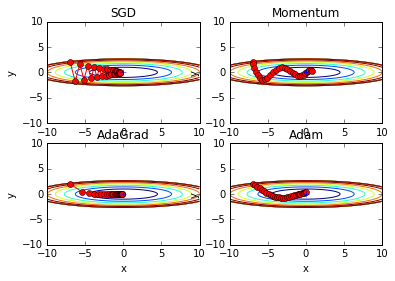

In [4]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict
from common.optimizer import *


def f(x, y):
    return x**2 / 20.0 + y**2


def df(x, y):
    return x / 10.0, 2.0*y

init_pos = (-7.0, 2.0)
params = {}
params['x'], params['y'] = init_pos[0], init_pos[1]
grads = {}
grads['x'], grads['y'] = 0, 0


optimizers = OrderedDict()
optimizers["SGD"] = SGD(lr=0.95)
optimizers["Momentum"] = Momentum(lr=0.1)
optimizers["AdaGrad"] = AdaGrad(lr=1.5)
optimizers["Adam"] = Adam(lr=0.3)

idx = 1

for key in optimizers:
    optimizer = optimizers[key]
    x_history = []
    y_history = []
    params['x'], params['y'] = init_pos[0], init_pos[1]
    
    for i in range(30):
        x_history.append(params['x'])
        y_history.append(params['y'])
        
        grads['x'], grads['y'] = df(params['x'], params['y'])
        optimizer.update(params, grads)
    

    x = np.arange(-10, 10, 0.01)
    y = np.arange(-5, 5, 0.01)
    
    X, Y = np.meshgrid(x, y) 
    Z = f(X, Y)
    
    # for simple contour line  
    mask = Z > 7
    Z[mask] = 0
    
    # plot 
    plt.subplot(2, 2, idx)
    idx += 1
    plt.plot(x_history, y_history, 'o-', color="red")
    plt.contour(X, Y, Z)
    plt.ylim(-10, 10)
    plt.xlim(-10, 10)
    plt.plot(0, 0, '+')
    #colorbar()
    #spring()
    plt.title(key)
    plt.xlabel("x")
    plt.ylabel("y")
    
plt.show()

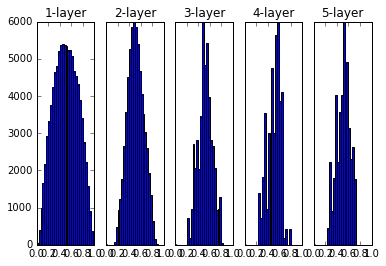

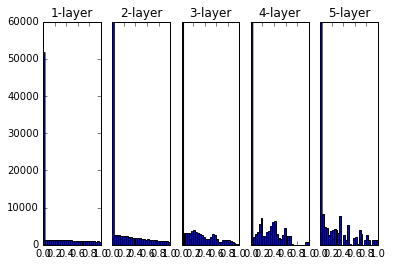

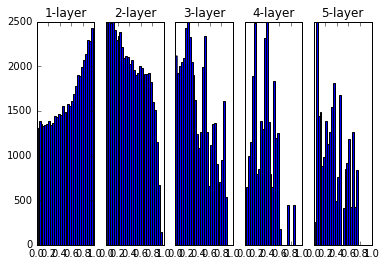

In [10]:
# coding: utf-8
import numpy as np
import matplotlib.pyplot as plt


def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def ReLU(x):
    return np.maximum(0, x)


def tanh(x):
    return np.tanh(x)
    
input_data = np.random.randn(1000, 100)  # 1000個のデータ
node_num = 100  # 各隠れ層のノード（ニューロン）の数
hidden_layer_size = 5  # 隠れ層が5層
activations = {}  # ここにアクティベーションの結果を格納する
activations1 = {} 
activations2 = {} 

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    # 初期値の値をいろいろ変えて実験しよう！
    #w = np.random.randn(node_num, node_num) * 1
    #w = np.random.randn(node_num, node_num) * 0.01
    w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)
    #w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)


    a = np.dot(x, w)

    # 活性化関数の種類も変えて実験しよう！
    z = sigmoid(a)
    z1 = ReLU(a)
    z2 = tanh(a)

    activations[i] = z
    activations1[i] = z1
    activations2[i] = z2

# ヒストグラムを描画
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    # plt.xlim(0.1, 1)
    # plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

for i, a in activations1.items():
    plt.subplot(1, len(activations1), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    # plt.xlim(0.1, 1)
    # plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

for i, a in activations2.items():
    plt.subplot(1, len(activations2), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    # plt.xlim(0.1, 1)
    # plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

train loss:2.32386488083
=== epoch:1, train acc:0.133333333333, test acc:0.1108 ===
train loss:2.31855195542
train loss:2.28192010361
train loss:2.30959525233
=== epoch:2, train acc:0.14, test acc:0.111 ===
train loss:2.29540970193
train loss:2.32042354478
train loss:2.29499217512
=== epoch:3, train acc:0.14, test acc:0.1125 ===
train loss:2.31494053228
train loss:2.29052967264
train loss:2.29407780624
=== epoch:4, train acc:0.146666666667, test acc:0.1141 ===
train loss:2.29602375199
train loss:2.30740213512
train loss:2.31496751969
=== epoch:5, train acc:0.15, test acc:0.1152 ===
train loss:2.30807274907
train loss:2.29238221133
train loss:2.29492956637
=== epoch:6, train acc:0.15, test acc:0.1173 ===
train loss:2.32011142627
train loss:2.27300710639
train loss:2.31333365805
=== epoch:7, train acc:0.153333333333, test acc:0.1179 ===
train loss:2.26014786564
train loss:2.30109901447
train loss:2.28658287245
=== epoch:8, train acc:0.153333333333, test acc:0.1205 ===
train loss:2.304420

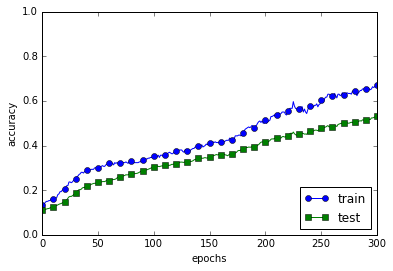

In [11]:
# coding: utf-8
import os
import sys
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.trainer import Trainer

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
t_train = t_train[:300]

# Dropuoutの有無、割り合いの設定 ========================
use_dropout = True  # Dropoutなしのときの場合はFalseに
dropout_ratio = 0.2
# ====================================================

network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                              output_size=10, use_dropout=use_dropout, dropout_ration=dropout_ratio)
trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=301, mini_batch_size=100,
                  optimizer='sgd', optimizer_param={'lr': 0.01}, verbose=True)
trainer.train()

train_acc_list, test_acc_list = trainer.train_acc_list, trainer.test_acc_list

# グラフの描画==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

epoch:0, train acc:0.08, test acc:0.0922
epoch:1, train acc:0.09, test acc:0.0919
epoch:2, train acc:0.11, test acc:0.0935
epoch:3, train acc:0.116666666667, test acc:0.0987
epoch:4, train acc:0.126666666667, test acc:0.1059
epoch:5, train acc:0.136666666667, test acc:0.1156
epoch:6, train acc:0.163333333333, test acc:0.1354
epoch:7, train acc:0.223333333333, test acc:0.1585
epoch:8, train acc:0.253333333333, test acc:0.1774
epoch:9, train acc:0.31, test acc:0.2128
epoch:10, train acc:0.34, test acc:0.2302
epoch:11, train acc:0.386666666667, test acc:0.2647
epoch:12, train acc:0.43, test acc:0.2945
epoch:13, train acc:0.45, test acc:0.3091
epoch:14, train acc:0.466666666667, test acc:0.3288
epoch:15, train acc:0.493333333333, test acc:0.3511
epoch:16, train acc:0.526666666667, test acc:0.3712
epoch:17, train acc:0.56, test acc:0.387
epoch:18, train acc:0.556666666667, test acc:0.3969
epoch:19, train acc:0.576666666667, test acc:0.4104
epoch:20, train acc:0.61, test acc:0.4357
epoch:21,

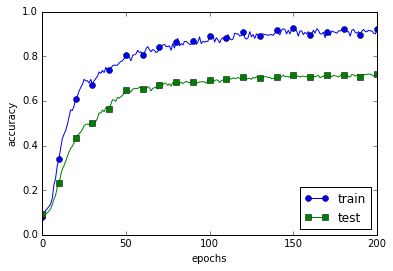

In [12]:
# coding: utf-8
import os
import sys

sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
t_train = t_train[:300]

# weight decay（荷重減衰）の設定 =======================
#weight_decay_lambda = 0 # weight decayを使用しない場合
weight_decay_lambda = 0.1
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda)
optimizer = SGD(lr=0.01)

max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        print("epoch:" + str(epoch_cnt) + ", train acc:" + str(train_acc) + ", test acc:" + str(test_acc))

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break


# 3.グラフの描画==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()
